# ❓ Why Does Lasso Regression Create Sparsity?

---

## 🔍 The Core Reason: L1 Penalty Geometry

Lasso Regression adds an **L1 penalty** (sum of absolute values of coefficients) to the loss function:

$$
J(\theta) = \sum_{i=1}^{n} \left( y^{(i)} - \theta^T x^{(i)} \right)^2 + \lambda \sum_{j=1}^{p} |\theta_j|
$$

This penalty encourages many coefficients to become **exactly zero**.

---

## 🧠 Intuition: The Shape of the Constraint Region

- The L1 penalty defines a **diamond-shaped constraint region** in parameter space.
- The OLS loss contours are elliptical.
- The optimal solution is found where these two intersect.

> The **corners of the diamond** (where one or more $\theta_j = 0$) are more likely points of intersection.

These **corners** naturally promote **sparse solutions**, where **some weights are exactly zero**.

---

## 📐 Geometric Comparison

| Method | Constraint Shape | Typical Solution |
|--------|------------------|------------------|
| Ridge  | Circle/Ellipse   | Inside region (no zero weights) |
| Lasso  | Diamond          | On edges/corners (some zero weights) |

---

## 📌 Mathematical Perspective

- The **subgradient** of the L1 norm is not smooth at zero.
- This allows the optimization process to **“stick”** at zero, unlike L2 which smoothly approaches it.
- Hence, it's **mathematically easier to land on zero** with L1 regularization.

---

## ✅ Result: Sparsity

- Lasso doesn’t just shrink coefficients — it **selectively eliminates them**.
- This leads to **sparser models**: only the most important features have non-zero weights.
- It's a form of **automatic feature selection** during training.

---

## 📈 Conclusion

Lasso creates sparsity because of:

- The **geometry** of the L1 constraint (sharp corners),
- The **nature of the L1 norm**, which promotes exact zeros,
- And the **optimization dynamics**, which easily converge to sparse solutions.

---


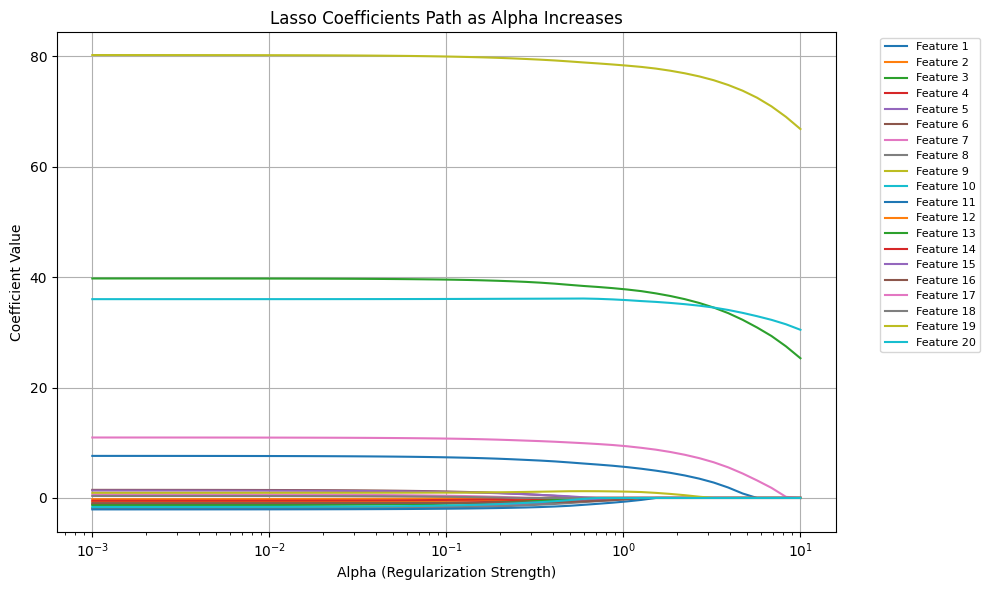

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# 🔧 Generate synthetic regression data
X, y, coef_true = make_regression(
    n_samples=100, 
    n_features=20, 
    n_informative=5,   # Only 5 features are useful
    noise=10, 
    coef=True, 
    random_state=42
)

alphas = np.logspace(-3, 1, 50)  # Regularization values
coefs = []

# 🎯 Fit Lasso for each alpha
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

# 📈 Plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

coefs = np.array(coefs)
for i in range(coefs.shape[1]):
    ax.plot(alphas, coefs[:, i], label=f"Feature {i+1}")

plt.xscale('log')
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficients Path as Alpha Increases")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


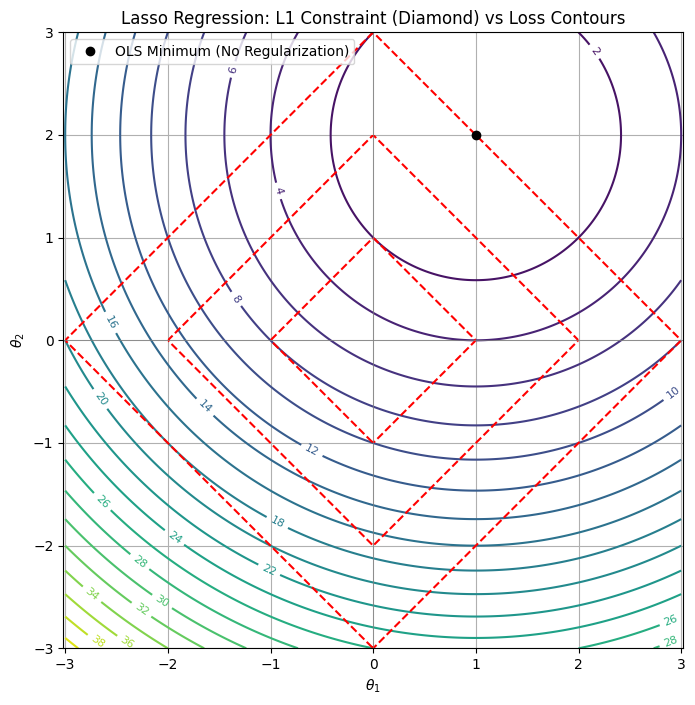

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of θ1 and θ2 values
theta1 = np.linspace(-3, 3, 300)
theta2 = np.linspace(-3, 3, 300)
T1, T2 = np.meshgrid(theta1, theta2)

# Simulate a quadratic loss function: (θ1 - 1)^2 + (θ2 - 2)^2
loss = (T1 - 1)**2 + (T2 - 2)**2

# L1 norm constraint: |θ1| + |θ2| <= constant
l1_constraint = np.abs(T1) + np.abs(T2)

# Plotting
plt.figure(figsize=(8, 8))
contours = plt.contour(T1, T2, loss, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# Plot the L1 constraint region (diamond) for different lambda values
for c in [1, 2, 3]:
    plt.contour(T1, T2, l1_constraint, levels=[c], colors='red', linestyles='--')

# Highlight the minimum of the loss
plt.plot(1, 2, 'ko', label='OLS Minimum (No Regularization)')

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)

plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title("Lasso Regression: L1 Constraint (Diamond) vs Loss Contours")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


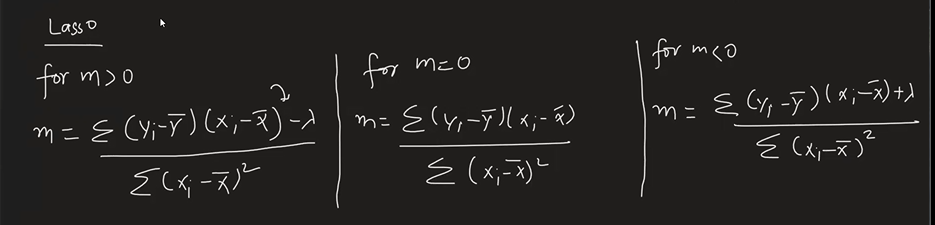

In ridge regression, the lambda is in the denominator so we can only limit to 0,but not 0. In lasso the lambda is in the numerator so we can push it to 0.